In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/large_cust.csv")

In [5]:
rfm_log = df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1)

In [6]:
from sklearn.preprocessing import normalize

df_scaled = pd.DataFrame(normalize(rfm_log), columns=['Recency','Frequency','Monetary'])

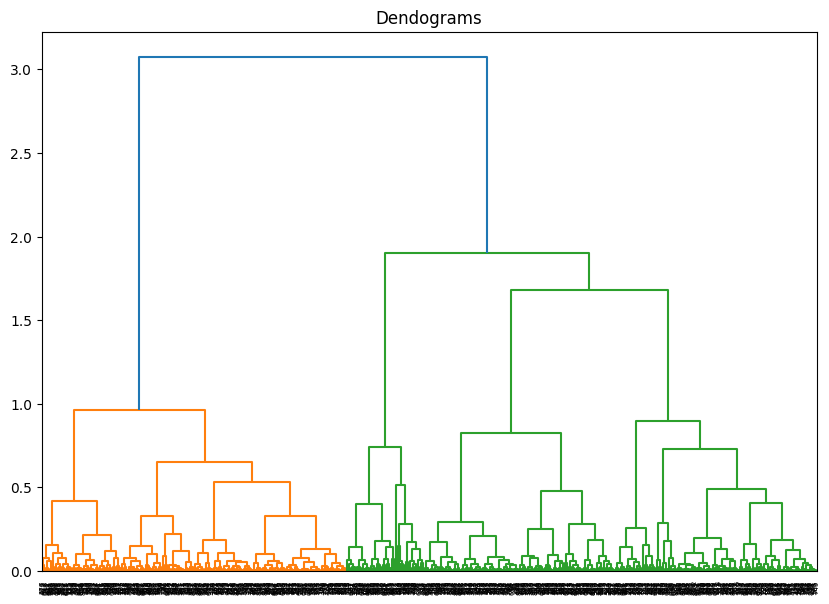

In [9]:
import scipy.cluster.hierarchy as hc

plt.figure(figsize=(10,7)) # Increase size of plot to make it easier to review
plt.title("Dendograms")
dend = hc.dendrogram(hc.linkage(df_scaled, method='ward'))

In [13]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
cluster = model.fit_predict(df_scaled)

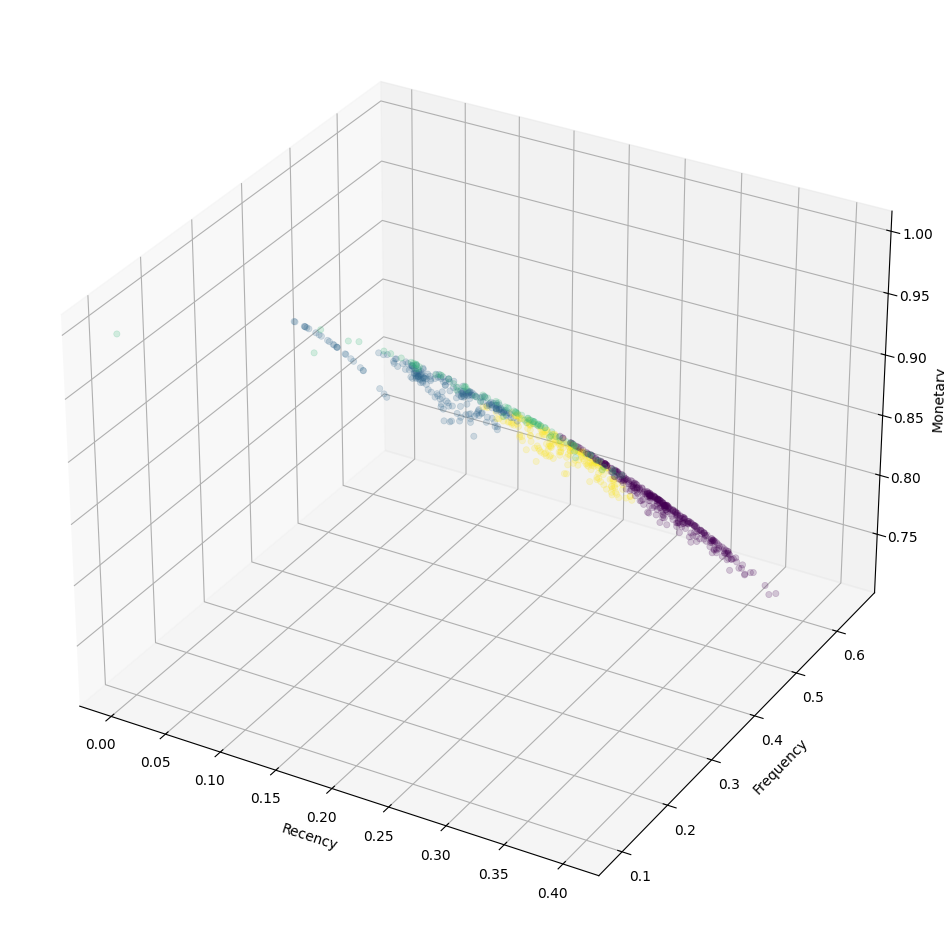

In [14]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(df_scaled.Recency, df_scaled.Frequency, df_scaled.Monetary, c=cluster, cmap='viridis', linewidth=0.5, alpha=0.2);
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

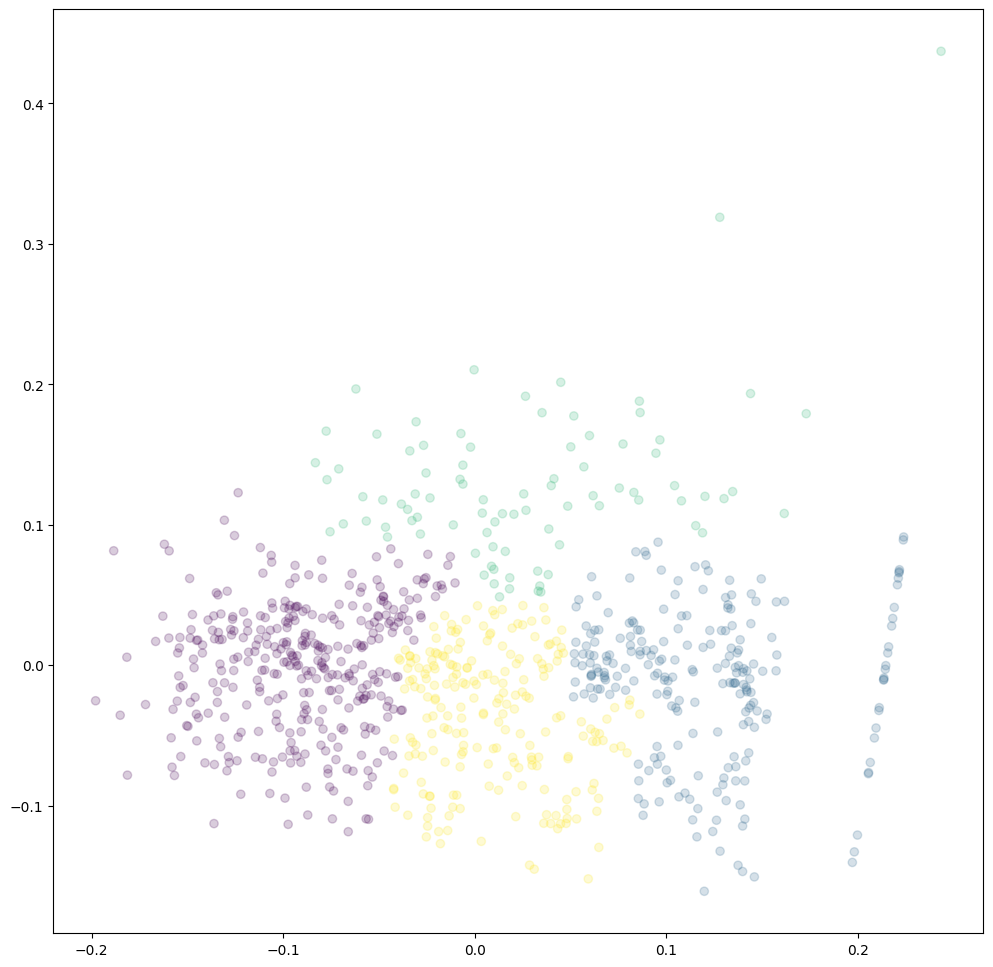

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca2 = pca.transform(df_scaled)

(x, y) = (df_pca2[:,0], df_pca2[:,1])
plt.figure(figsize=(12,12))
plt.scatter(x,y, c=cluster, alpha=0.2, cmap='viridis')
plt.show()

In [ ]:
df['cluster'] = cluster